## CITS2402 - Introduction to Data Science - Assignment.

### Comparing Demographic Trends in Australian and New Zealand Census Data

**Date:** August 2024.

## Declaration

This declaration should be completed and remain attached to the top of your submission.

*I/we am/are aware of the University’s [policy on academic conduct](https://www.uwa.edu.au/policy/-/media/Project/UWA/UWA/Policy-Library/Policy/Student-Administration/Academic-Integrity/Academic-Integrity-Policy.doc) and I declare that this assignment is entirely the work of the author(s) listed below and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a copy for my own records.*

- Name 1:
- Student ID 1:
- Name 2:
- Student ID 2:
- Name 3:
- Student ID 3:
- Date:


The suffix `-template` should be replaced with the corresponding student numbers. For instance, if you are doing your assignment with another person, you should rename your file as `CITS2402-Assignment-STDNO1-STDNO2.ipynb`, where 'STDNO1' and 'STDNO2' are the corresponding student numbers involved in the submission. 

<hr>


In [2]:
# Your work starts here...

### topic
description of the topic


In [1]:
#Loading the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data Acquisition
**Steps to download the raw data for New Zealand:**
* A
  * 123
* B

In [ ]:

# Constants pointing to the file paths
# The first two are for Australia, and the last one is for New Zealand
Aus_DATA_A = 'dataset/2021Census_G17C_AUS_AUS.csv'
Aus_DATA_B = 'dataset/2021Census_G49B_AUS_AUS.csv'
NZ_DATA = 'dataset/STATSNZ,CEN18_WRK_017,1.0+all.csv'

# Reading data
# A and B are for Australia, A is Income data, and B is Education data. C is New Zealand census data
data_a = pd.read_csv(Aus_DATA_A)
data_b = pd.read_csv(Aus_DATA_B)
data_c = pd.read_csv(NZ_DATA,low_memory=False)

In [ ]:
# Data Preprocessing

In [ ]:
# AUstralia-Income

In [4]:
# Reshape the dataset using melt
df_income= pd.melt(data_a, id_vars=['AUS_CODE_2021'], 
                         var_name='Age_Income', value_name='Count')
# Print the data to have a further look
print(df_income)

In [6]:
# Remove rows containing 'Total' in the column 'Age_Income'
remove = df_income[df_income["Age_Income"].str.contains("Tot")].index
df_income_new = df_income.drop(remove)
# Remove rows containing 'NS' in the column 'Age_Income'
remove2 = df_income_new[df_income_new["Age_Income"].str.contains("NS")].index
df_income_new2 = df_income_new.drop(remove2)

In [12]:
# Extract 'Income_Range' from 'Age_Income' column using the pattern of the data
df_income_new2["Income_Range"]=df_income_new2["Age_Income"].str.extract(r'(\d+_\d+|3500_more)')
# Extract 'Age_Group' from 'Age_Income' column using the pattern of the data
df_income_new2["Age_Group"]=df_income_new2["Age_Income"].str.extract(r'(\d+_\d+)_yrs?') 
# Noticed that it didn't extract Age Group of '85ov'
# knowing that there was no missing data in the original dataset, fill the missing value with '85ov'
df_income_new2["Age_Group"].fillna('85ov',inplace=True)
# Drop the original column after extracting
df_income_new2.drop(columns=['Age_Income'],inplace=True)

In [15]:
df_income_new2.drop(columns=['Age_Income'],inplace=True)

In [111]:
# Print the dataframe to check the result
print(df_income_new2)

   AUS_CODE_2021   Count Income_Range Age_Group
0            AUS   42444      650_799     15_19
1            AUS  183103      650_799     20_24
2            AUS  272206      650_799     25_34
3            AUS  216035      650_799     35_44
4            AUS  200176      650_799     45_54
..           ...     ...          ...       ...
84           AUS  217431    3500_more     45_54
85           AUS  129487    3500_more     55_64
86           AUS   43037    3500_more     65_74
87           AUS   14948    3500_more     75_84
88           AUS    4614    3500_more      85ov

[81 rows x 4 columns]


In [19]:
# Australia - Education

In [109]:
# Reshape the data using melt
df_education = pd.melt(data_b, id_vars=['AUS_CODE_2021'], 
                         var_name='Education_Age', value_name='Count2')
# Print the data to have a further look
print(df_education.head())

  AUS_CODE_2021      Education_Age  Count2
0           AUS  P_PGrad_Deg_35_44  398318
1           AUS  P_PGrad_Deg_45_54  247742
2           AUS  P_PGrad_Deg_55_64  169407
3           AUS  P_PGrad_Deg_65_74  106963
4           AUS  P_PGrad_Deg_75_84   38322


In [24]:
# Remove rows with certain irrelevant values ('NS','IDes','Tot','nfd') in the 'Education_Age' column
df_edu_new=df_education[~df_education['Education_Age'].str.contains('NS|IDes|Tot|nfd')]

In [29]:
# Create a copy of the dataset
df_edu_new=df_edu_new.copy()
# Create and extract 'Age_Group' from 'Education_Age' using its patterns
df_edu_new.loc[:,"Age_Group"]=df_edu_new["Education_Age"].str.extract(r'(\d{2}_\d{2}|85ov)')
# Remove the prefix 'P_' in each row of the 'Education_Age' column using its pattern
df_edu_new['Education_Age']=df_edu_new['Education_Age'].str.replace(r'P_','',regex=True)
 # Remove the age group from each row of 'Education_Age'
df_edu_new['Education_Age']=df_edu_new['Education_Age'].str.replace(r'(_\d{2}_\d{2}|_\d{2}ov)$','',regex=True)
# Rename 'Education_Age' to 'Education_Level'
df_edu_new.rename(columns={'Education_Age':'Education_Level'},inplace=True)

In [38]:
# Sum the population in each Educatio Level Group, for future use
sum_by_education = df_edu_new.groupby('Education_Level')['Count2'].sum().reset_index()
# Display the result
print(sum_by_education)

        Education_Level   Count2
0        AdvDip_and_Dip  1946731
1               BachDeg  3609259
2           Cert_III_IV  3340083
3             Cert_I_II   252191
4  GradDip_and_GradCert   495951
5             PGrad_Deg   967786
10612001


In [108]:
# Print the cleaned data for Income
print(df_income_new2.head())

  AUS_CODE_2021   Count Income_Range Age_Group
0           AUS   42444      650_799     15_19
1           AUS  183103      650_799     20_24
2           AUS  272206      650_799     25_34
3           AUS  216035      650_799     35_44
4           AUS  200176      650_799     45_54


In [107]:
# Print the cleaned data for Education
print(df_edu_new.head())

  AUS_CODE_2021 Education_Level  Count2 Age_Group
0           AUS       PGrad_Deg  398318     35_44
1           AUS       PGrad_Deg  247742     45_54
2           AUS       PGrad_Deg  169407     55_64
3           AUS       PGrad_Deg  106963     65_74
4           AUS       PGrad_Deg   38322     75_84


In [41]:
# Merge the Education data and the Income data, using Age_Group
merged_data=pd.merge(df_edu_new,df_income_new2,on='Age_Group', how='inner')
merged_data

,AUS_CODE_2021_x,Education_Level,Count2,Age_Group,AUS_CODE_2021_y,Count,Income_Range
0,AUS,PGrad_Deg,398318,35_44,AUS,216035,650_799
1,AUS,PGrad_Deg,398318,35_44,AUS,292552,800_999
2,AUS,PGrad_Deg,398318,35_44,AUS,366480,1000_1249
3,AUS,PGrad_Deg,398318,35_44,AUS,306625,1250_1499
4,AUS,PGrad_Deg,398318,35_44,AUS,296117,1500_1749
...,...,...,...,...,...,...,...
364,AUS,Cert_I_II,47697,25_34,AUS,332529,1500_1749
365,AUS,Cert_I_II,47697,25_34,AUS,220982,1750_1999
366,AUS,Cert_I_II,47697,25_34,AUS,318795,2000_2999
367,AUS,Cert_I_II,47697,25_34,AUS,53684,3000_3499


In [45]:
# Calculate the total population by Age Group
total_population_by_age = df_edu_new.groupby('Age_Group')['Count2'].sum().reset_index()
total_population_by_age.columns = ['Age_Group', 'Total']

# Merge total population with the Income Data
merged_income = df_income_new2.merge(total_population_by_age, on='Age_Group')

# Merge Education and Income data for further analysis
merged_data = df_edu_new.merge(merged_income, on='Age_Group', how='inner')

# Calculate estimated counts of individuals in each Education Level within Income Groups
merged_data['Estimated_Count'] = (merged_data['Count2'] / merged_data['Total']) * merged_data['Count']

In [46]:
# Function to calculate the average within an Income Range
def calculate_average(income_range):
    if income_range == '0':
        average = int(income_range)
    elif 'more' not in income_range :
        bounds=[]
        if '-' in income_range:
            bounds = income_range.split('-')
        elif '_' in income_range:
            bounds= income_range.split('_')
        average = (int(bounds[0])+int(bounds[1]))/2
    else:
        if '_' in income_range:
            income=income_range.replace('_more','')
        else:
            income = income_range.replace(' or more','')
        average = int(income)
    return average

In [47]:
# Apply the calculate_average function to each Income_Range, store it in a column called Income_Average
merged_data['Income_Average']=merged_data['Income_Range'].apply(calculate_average)
# Calculate the contribution using this formula: Average Income * Estimated Count
merged_data['Contribution']=merged_data['Income_Average']*merged_data['Estimated_Count']
# Group by Education Level and Age Group to sum the Total Weighted Income
grouped_data = merged_data.groupby(['Education_Level', 'Age_Group']).agg(Tot_weighted_income=('Contribution', 'sum')).reset_index()
# Group by Education Level to sum the Total Weighted Income
merged_new=grouped_data.groupby('Education_Level').agg(
    Tot_weighted_income=('Tot_weighted_income','sum')).reset_index()
# Create a column containing the total number of people in each Education Level, using the dataframe created earlier
merged_new["New_Tot_People"] = sum_by_education["Count2"]
# Create a column called Weighted_Ave storing the Weighted Average Income which is rounded to 3 decimal
# Calculate the Weighted Average Income for each Education Level using this formula:Total Weighted Income / Total Number of People 
merged_new['Weighted_Ave']=np.round(merged_new['Tot_weighted_income']/merged_new['New_Tot_People'],3)
# Drop not necessary columns
merged_new.drop(columns='Tot_weighted_income',inplace=True)
merged_new.drop(columns='New_Tot_People',inplace=True)

In [68]:
# Print the data
print(merged_new)

        Education_Level  Weighted_Ave
0        AdvDip_and_Dip      1588.615
1               BachDeg      1606.309
2           Cert_III_IV      1531.627
3             Cert_I_II      1266.760
4  GradDip_and_GradCert      1672.269
5             PGrad_Deg      1739.021


In [70]:
merged_new.to_csv('b.csv', index=False)

In [71]:
# Print the first few rows of the New Zealand data to understand its structure
print(data_c.head())

                     DATAFLOW AGE_CEN18_WRK_017: Age group  \
0  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   
1  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   
2  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   
3  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   
4  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   

  AREA_CEN18_WRK_017: Area HIGHESTQUALS_CEN18_WRK_017: Highest qualification  \
0  001: Far North District                             000: No qualification   
1  001: Far North District                             000: No qualification   
2  001: Far North District                             000: No qualification   
3  001: Far North District                             000: No qualification   
4  001: Far North District                             000: No qualification   

  INCOME_CEN18_WRK_017: Total personal income SEX_CEN18_WRK_017: Sex  \
0                                    11: Loss                1: Male   
1 

In [72]:
# Filter the rows for 2018
data_c_in2018=data_c[data_c["YEAR_CEN18_WRK_017: Year"]==2018]
print(data_c_in2018.head())

                     DATAFLOW AGE_CEN18_WRK_017: Age group  \
1  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   
3  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   
5  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   
7  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   
9  STATSNZ:CEN18_WRK_017(1.0)               2: 15-29 years   

  AREA_CEN18_WRK_017: Area HIGHESTQUALS_CEN18_WRK_017: Highest qualification  \
1  001: Far North District                             000: No qualification   
3  001: Far North District                             000: No qualification   
5  001: Far North District                             000: No qualification   
7  001: Far North District                             000: No qualification   
9  001: Far North District                             000: No qualification   

  INCOME_CEN18_WRK_017: Total personal income SEX_CEN18_WRK_017: Sex  \
1                                    11: Loss                1: Male   
3 

In [74]:
# Select columns relevant to the analysis
rename_c = data_c_in2018[
    ['HIGHESTQUALS_CEN18_WRK_017: Highest qualification',
     'INCOME_CEN18_WRK_017: Total personal income',
    'OBS_VALUE']
]

# Rename columns
rename_c = rename_c.rename(columns={
    'HIGHESTQUALS_CEN18_WRK_017: Highest qualification': 'Education_Level',
    'INCOME_CEN18_WRK_017: Total personal income': 'Income_Range',
    'OBS_VALUE':'Count'
})

In [76]:
# Filter out rows with irrelevant data in 'Income_Range' using its pattern
Filtered_c = rename_c[~rename_c['Income_Range'].str.contains(r'7777:|99:|999:|11:')]
# Filter out rows with irrelevant data in 'Education_Level' using its pattern
Filtered_c_new = Filtered_c[~Filtered_c['Education_Level'].str.contains(r'7777:|999:|9999:',regex=True)]

# Shorten the values for Education_Level and Income_Range
Filtered_c_new=Filtered_c_new.copy()
# Split the values using ': ', and only extract the part after ': '
Filtered_c_new['Education_Level']=Filtered_c_new['Education_Level'].str.split(': ').str[1]
Filtered_c_new['Income_Range']=Filtered_c_new['Income_Range'].str.split(': ').str[1]

In [83]:
# Function to clean the Income_Range, which will remove unnecessary characters or replace by number
def clean_income(income_range):
    if '$' in income_range:
        income_range=income_range.replace('$','')
    elif income_range == 'Zero income':
        income_range = income_range.replace('Zero income','0')
    income_range = income_range.replace(',','')
    return income_range

In [84]:
# Clean each row of the Income_Range using the function clean_income
Filtered_c_new['Income_Range']=Filtered_c_new['Income_Range'].apply(clean_income)

In [85]:
# Double check whether the values are cleaned 
unique_age_groups = Filtered_c_new['Income_Range'].unique()
print(unique_age_groups)
unique_age_groups2 = Filtered_c_new['Education_Level'].unique()
print(unique_age_groups2)

['0' '1-5000' '5001-10000' '10001-15000' '15001-20000' '20001-25000'
 '25001-30000' '30001-35000' '35001-40000' '40001-50000' '50001-60000'
 '60001-70000' '70001-100000' '100001-150000' '150001 or more']


In [90]:
# For the comparison with Australia, combine some categories into one, rename some Education Level
Filtered_c_new['Education_Level']=Filtered_c_new['Education_Level'].replace({'Level 1 certificate':'Level 1 & 2 certificate',
                                                                             'Level 2 certificate':'Level 1 & 2 certificate',
                                                                             'Level 3 certificate':'Level 3 & 4 certificate',
                                                                             'Level 4 certificate':'Level 3 & 4 certificate',
                                                                             'Level 5 diploma':'Level 5 & 6 diploma',
                                                                             'Level 6 diploma':'Level 5 & 6 diploma'})
# Combine them
grouped_c = Filtered_c_new.groupby(['Education_Level','Income_Range'],as_index=False)

In [ ]:
# Sum the total population in each Education Level
filtered_grouped_c = grouped_c['Count'].sum()
# Calculate the Income_Average using function calculate_average
filtered_grouped_c['Income_Average']=filtered_grouped_c['Income_Range'].apply(calculate_average)
# Calculate the Contribution
filtered_grouped_c['Contribution']=filtered_grouped_c['Income_Average']*filtered_grouped_c['Count']
# Sum Total Weighted Income and Population in each Education Level
Weighted_Income_C=filtered_grouped_c.groupby('Education_Level').agg(
    Tot_weighted_income=('Contribution','sum'),Tot_people=('Count','sum')).reset_index()
# Calculate Weighted Average Income for each Education Level
Weighted_Income_C['Weighted_Ave']=Weighted_Income_C['Tot_weighted_income']/Weighted_Income_C['Tot_people']
# The current value is annual
# divided into the number of weeks in 2018 which is 52 weeks with 1 day to get weekly weighted income
Weighted_Income_C['Weighted_Ave']=np.round(Weighted_Income_C['Weighted_Ave']/52.1429,3)

In [98]:
# Drop unnecessary column
Weighted_Income_C.drop(columns=['Tot_weighted_income'],inplace=True)
Weighted_Income_C.drop(columns=['Tot_people'],inplace=True)

In [102]:
print(Weighted_Income_C)

                             Education_Level  Weighted_Ave
0  Bachelor degree and level 7 qualification      1077.552
1                           Doctorate degree      1606.787
2                    Level 1 & 2 certificate       697.957
3                    Level 3 & 4 certificate       761.960
4                        Level 5 & 6 diploma       933.794
5                             Masters degree      1296.976
6                           No qualification       534.006
7    Overseas secondary school qualification       634.783
8          Post-graduate and honours degrees      1290.286


In [103]:
# hij
Weighted_Income_C.to_csv('Weighted_Income_C.csv', index=False)

In [104]:
# visualization
# Plot the relationship between education level and average income

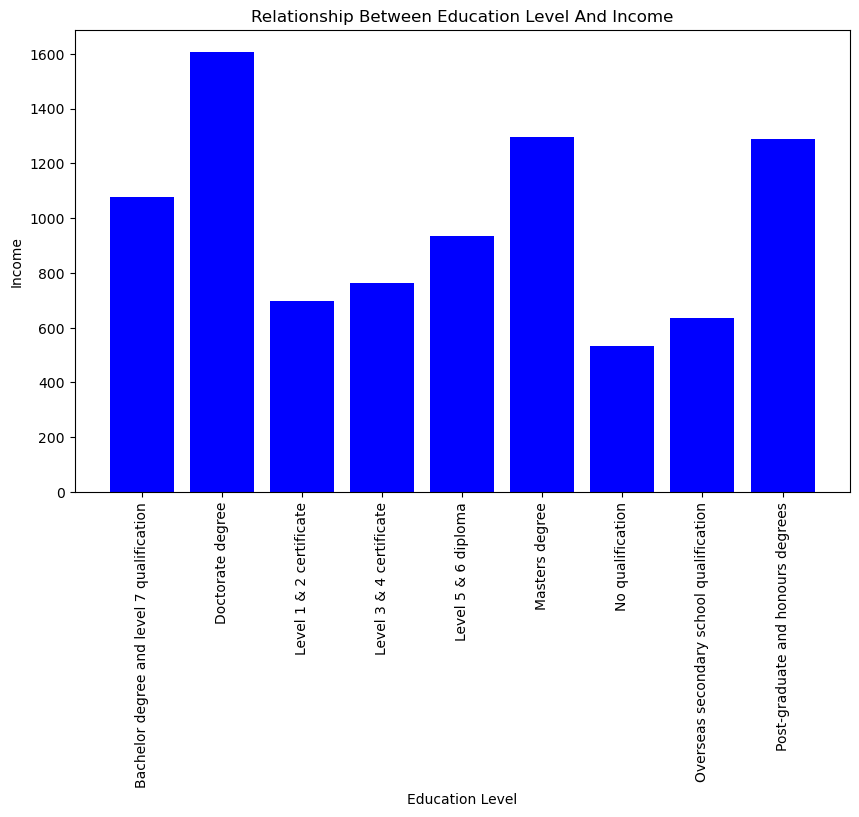

In [105]:

# Get the cleaned data
education = Weighted_Income_C['Education_Level'].tolist()
income = Weighted_Income_C['Weighted_Ave'].tolist()


# Create the bar chart
plt.figure(figsize=(10,6)) 
# Choose Blue as the color of the bar
plt.bar(education, income, color='blue')

# Add labels and title to make the chart clearer
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.title('Relationship Between Education Level And Income')
 # Rotate x-axis labels for better readability
plt.xticks(rotation=90) 

# Display the chart
plt.show()


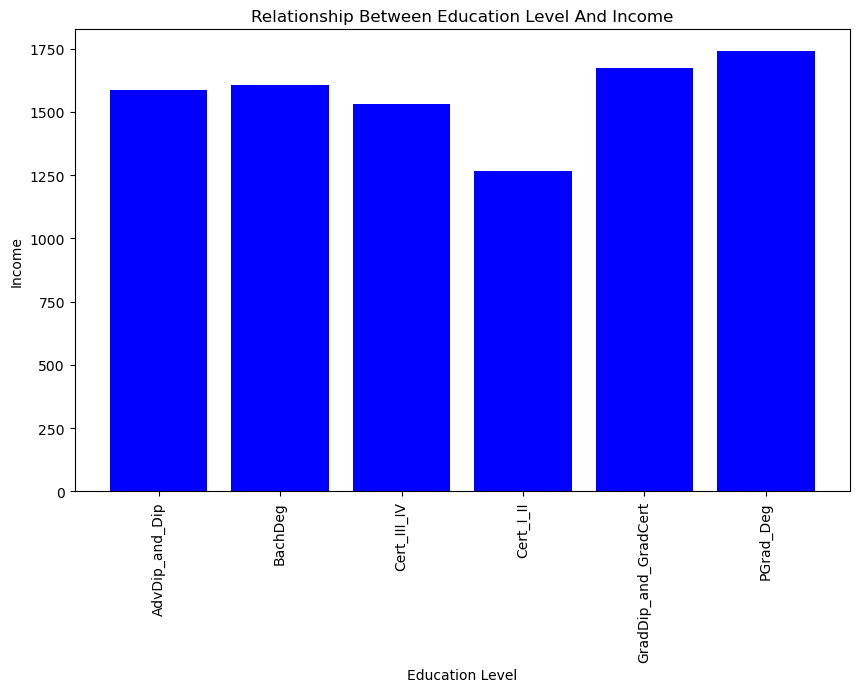

In [106]:
# Get the cleaned data
education = merged_new['Education_Level'].tolist()
income = merged_new['Weighted_Ave'].tolist()

# Create the bar chart
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
# Choose Red as the color of the bar
plt.bar(education, income, color='red')  

# Add labels and title to make the chart clearer
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.title('Relationship Between Education Level And Income')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  

# Display the chart
plt.show()
